---
---
# Defunciones en Chile 2016-2023
---
---

#### Nombre: Nicolás De la Fuente

---
### 1.- Importar librerias:

Se importaron las librerías pandas, numpy, seaborn, matplotlib y sklearn:
- Pandas se utilizó para la lectura de los sets de datos, el trabajo con data frames y la depuración de ellos.
- numpy para hacer cálculos y trabajar con matrices.
- seaborn y matplotlib para graficar los datos.
- sklearn preprocessing para la normalización de los datos
- sklearn decomposition para disminuir las dimensiones por medio de PCA
- sklearn model selection para hacer la división de los datos en los set de entrenamiento y testeo
- sklearn cluster para hacer los modelos no supervisados de KMeans y DBSCAN
- sklearn metrics para el cálculo de las estadísticas de accuracy, precision, f1 score y recall.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn import preprocessing as sk

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
from sklearn import decomposition

In [7]:
from sklearn.model_selection import train_test_split, KFold

In [8]:
from sklearn.cluster import KMeans, DBSCAN

In [9]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

In [10]:
import mysql.connector as sql

In [11]:
import time

---
### 2.- Analisis exploratorio

Empezaremos cargando los set utilizando la librerias de pandas. Se trabajará con dos set uno correspondiente a las defunciones en Chile entre 2016 y 2021 (obtenida desde kaggle) y otra de defunciones en Chile entre 2021 y 2023 (obtenida desde Minsal). Se adjuntará también el archivo "Diccionario de Datos BBDD", que corresponde a los atributos de cada set de datos, que en este caso son compartidos pero que tienen algunas diferencias que abordaremos más adelante.

#### 2.1 Lectura y exploracion de DF1 "defunciones entre 2016 y 2021"

Cargamos la libreria de "defunciones_2016-2021_deis.csv", y lo visualizamos las primeras entradas. Inmediatamente vemos que hay algunas columnas con codigos que no nos entregan mucha informacion y con subdiagnosticos que no tienen datos, tambien tenemos un atributo de id unico "Unnamed: 0" y una reiteracion entre algunas columnas con datos duros y su codigo, por ejemplo con el codigo de la comuna de residencia y la comuna de residencia. Al ver la informacion del dataframe vemos que hay atributos con 189.057 y 46.583 entradas de 688.917

In [12]:
df = pd.read_csv("defunciones_2016-2021_deis.csv", sep=",")

In [13]:
df.head()

,Unnamed: 0,Año,Fecha_def,Sexo,Edad,Edad_num,Cod_com_res,Com_resi,Reg_resi,Causa_bas_def,...,DIAG2,CAP_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2,lugar_def
0,0,2021,2021-06-01,Hombre,1,50,13110,La Florida,Metropolitana de Santiago,I219,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
1,1,2021,2021-05-29,Hombre,1,31,13301,Colina,Metropolitana de Santiago,B208,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
2,2,2021,2021-06-02,Hombre,1,39,6101,Rancagua,Del Libertador B. O'Higgins,R960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Otro
3,3,2021,2021-06-01,Mujer,1,58,13129,San Joaquín,Metropolitana de Santiago,C539,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
4,4,2021,2021-05-27,Hombre,1,46,15101,Arica,De Arica y Parinacota,I219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688917 entries, 0 to 688916
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Unnamed: 0                 688917 non-null  int64 
 1   Año                        688917 non-null  int64 
 2   Fecha_def                  688917 non-null  object
 3   Sexo                       688917 non-null  object
 4   Edad                       688917 non-null  int64 
 5   Edad_num                   688917 non-null  int64 
 6   Cod_com_res                688917 non-null  int64 
 7   Com_resi                   688917 non-null  object
 8   Reg_resi                   688917 non-null  object
 9   Causa_bas_def              688917 non-null  object
 10  CAPITULO_DIAG1             688917 non-null  object
 11  GLOSA_CAPITULO_DIAG1       688917 non-null  object
 12  CODIGO_GRUPO_DIAG1         688917 non-null  object
 13  GLOSA_GRUPO_DIAG1          688917 non-null  

In [15]:
df.columns

Index(['Unnamed: 0', 'Año', 'Fecha_def', 'Sexo', 'Edad', 'Edad_num',
       'Cod_com_res', 'Com_resi', 'Reg_resi', 'Causa_bas_def',
       'CAPITULO_DIAG1', 'GLOSA_CAPITULO_DIAG1', 'CODIGO_GRUPO_DIAG1',
       'GLOSA_GRUPO_DIAG1', 'CODIGO_CATEGORIA_DIAG1', 'GLOSA_CATEGORIA_DIAG1',
       'CODIGO_SUBCATEGORIA_DIAG1', 'GLOSA_SUBCATEGORIA_DIAG1', 'DIAG2',
       'CAP_DIAG2', 'GLOSA_CAPITULO_DIAG2', 'CODIGO_GRUPO_DIAG2',
       'GLOSA_GRUPO_DIAG2', 'CODIGO_CATEGORIA_DIAG2', 'GLOSA_CATEGORIA_DIAG2',
       'CODIGO_SUBCATEGORIA_DIAG2', 'GLOSA_SUBCATEGORIA_DIAG2', 'lugar_def'],
      dtype='object')

In [16]:
df.describe()

,Unnamed: 0,Año,Edad,Edad_num,Cod_com_res
count,688917.000000,688917.000000,688917.000000,688917.000000,688917.000000
mean,344458.000000,2018.661218,1.025578,72.072000,9795.538505
std,198873.352036,1.729299,0.249346,18.612659,3909.891280
min,0.000000,2016.000000,1.000000,1.000000,1101.000000
25%,172229.000000,2017.000000,1.000000,63.000000,6117.000000
50%,344458.000000,2019.000000,1.000000,76.000000,10106.000000
75%,516687.000000,2020.000000,1.000000,86.000000,13121.000000
max,688916.000000,2021.000000,9.000000,999.000000,99999.000000


In [17]:
df.describe(include=[object])

,Fecha_def,Sexo,Com_resi,Reg_resi,Causa_bas_def,CAPITULO_DIAG1,GLOSA_CAPITULO_DIAG1,CODIGO_GRUPO_DIAG1,GLOSA_GRUPO_DIAG1,CODIGO_CATEGORIA_DIAG1,...,DIAG2,CAP_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2,lugar_def
count,688917,688917,688917,688917,688917,688917,688917,688917,688917,688917,...,189057,46583,46583,46583,46583,46583,46583,46583,46583,688917
unique,2190,3,345,17,3037,20,20,199,199,974,...,733,1,1,32,32,231,231,732,730,3
top,2020-06-14,Hombre,Puente Alto,Metropolitana de Santiago,U071,I00-I99,Enfermedades del sistema circulatorio,C15-C26,Tumores malignos de los órganos digestivos,U07,...,,V01-Y98,Causas externas de morbilidad y de mortalidad,X60-X84,Lesiones autoinfligidas intencionalmente,X70,Lesión autoinfligida intencionalmente por ahor...,X599,EXPOSICIÓN A FACTORES NO ESPECIFICADOS QUE CAU...,Casa habitación
freq,588,364323,17030,264040,39140,169538,169538,66420,66420,50142,...,142474,46583,46583,10549,10549,9414,9414,4488,4488,324940


#### 2.2 Lectura y exploracion de DF1 "defunciones entre 2021 y 2023"

Cargamos el segundo set de defunciones entre 2021 y 2023, este dataset no tiene los encabezados de las columnas así que se las debemos dar según el archivo de diccionario. También vemos que tiene atributos con menos entradas no nulas y que concuerdan con las columnas del otro set, más adelante veremos que hacer con estos atributos, también vemos que no tienen atributo de id único.

In [18]:
encabezadoColumnas = ["ANO_DEF", "FECHA_DEF","GLOSA_SEXO","EDAD_TIPO","EDAD_CANT","CODIGO_COMUNA_RESIDENCIA","GLOSA_COMUNA_RESIDENCIA",
                      "GLOSA_REG_RES","DIAG1","CAPITULO_DIAG1","GLOSA_CAPITULO_DIAG1","CODIGO_GRUPO_DIAG1","GLOSA_GRUPO_DIAG1",
                      "CODIGO_CATEGORIA_DIAG1","GLOSA_CATEGORIA_DIAG1","CODIGO_SUBCATEGORIA_DIAG1","GLOSA_SUBCATEGORIA_DIAG1","DIAG2"
                      "CAPITULO_DIAG2","GLOSA_CAPITULO_DIAG2","CODIGO_GRUPO_DIAG2","GLOSA_GRUPO_DIAG2","CODIGO_CATEGORIA_DIAG2",
                      "GLOSA_CATEGORIA_DIAG2","CODIGO_SUBCATEGORIA_DIAG2","GLOSA_SUBCATEGORIA_DIAG2"," ","LUGAR_DEFUNCION"]

In [19]:
df2 = pd.read_csv("DEFUNCIONES_FUENTE_DEIS_2021_2023_30122023.csv", index_col=False, names=encabezadoColumnas, sep=';', encoding='latin-1')

In [20]:
df2.head()

,ANO_DEF,FECHA_DEF,GLOSA_SEXO,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,DIAG1,CAPITULO_DIAG1,...,DIAG2CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2,,LUGAR_DEFUNCION
0,2023,2023-06-24,Mujer,1,91,13132,Vitacura,Metropolitana de Santiago,U071,U00-U99,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
1,2023,2023-05-13,Hombre,1,58,6305,Nancagua,Del Libertador B. O'Higgins,I619,I00-I99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
2,2023,2023-11-15,Mujer,1,64,5103,Concón,De Valparaíso,K859,K00-K93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
3,2023,2023-08-31,Hombre,1,36,2101,Antofagasta,De Antofagasta,K922,K00-K93,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
4,2023,2023-11-19,Mujer,1,82,5501,Quillota,De Valparaíso,I219,I00-I99,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395319 entries, 0 to 395318
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ANO_DEF                    395319 non-null  int64 
 1   FECHA_DEF                  395319 non-null  object
 2   GLOSA_SEXO                 395319 non-null  object
 3   EDAD_TIPO                  395319 non-null  int64 
 4   EDAD_CANT                  395319 non-null  int64 
 5   CODIGO_COMUNA_RESIDENCIA   395319 non-null  int64 
 6   GLOSA_COMUNA_RESIDENCIA    395319 non-null  object
 7   GLOSA_REG_RES              395319 non-null  object
 8   DIAG1                      395319 non-null  object
 9   CAPITULO_DIAG1             395319 non-null  object
 10  GLOSA_CAPITULO_DIAG1       395319 non-null  object
 11  CODIGO_GRUPO_DIAG1         395319 non-null  object
 12  GLOSA_GRUPO_DIAG1          395319 non-null  object
 13  CODIGO_CATEGORIA_DIAG1     395319 non-null  

In [22]:
df2.columns

Index(['ANO_DEF', 'FECHA_DEF', 'GLOSA_SEXO', 'EDAD_TIPO', 'EDAD_CANT',
       'CODIGO_COMUNA_RESIDENCIA', 'GLOSA_COMUNA_RESIDENCIA', 'GLOSA_REG_RES',
       'DIAG1', 'CAPITULO_DIAG1', 'GLOSA_CAPITULO_DIAG1', 'CODIGO_GRUPO_DIAG1',
       'GLOSA_GRUPO_DIAG1', 'CODIGO_CATEGORIA_DIAG1', 'GLOSA_CATEGORIA_DIAG1',
       'CODIGO_SUBCATEGORIA_DIAG1', 'GLOSA_SUBCATEGORIA_DIAG1',
       'DIAG2CAPITULO_DIAG2', 'GLOSA_CAPITULO_DIAG2', 'CODIGO_GRUPO_DIAG2',
       'GLOSA_GRUPO_DIAG2', 'CODIGO_CATEGORIA_DIAG2', 'GLOSA_CATEGORIA_DIAG2',
       'CODIGO_SUBCATEGORIA_DIAG2', 'GLOSA_SUBCATEGORIA_DIAG2', ' ',
       'LUGAR_DEFUNCION'],
      dtype='object')

In [23]:
df2.describe()

,ANO_DEF,EDAD_TIPO,EDAD_CANT,CODIGO_COMUNA_RESIDENCIA
count,395319.000000,395319.000000,395319.000000,395319.000000
mean,2021.958573,1.017806,72.948244,9746.273017
std,0.807542,0.208465,18.078466,4010.178915
min,2021.000000,0.000000,0.000000,1101.000000
25%,2021.000000,1.000000,64.000000,6115.000000
50%,2022.000000,1.000000,77.000000,10101.000000
75%,2023.000000,1.000000,86.000000,13121.000000
max,2023.000000,9.000000,123.000000,99999.000000


In [24]:
df2.describe(include=[object])

,FECHA_DEF,GLOSA_SEXO,GLOSA_COMUNA_RESIDENCIA,GLOSA_REG_RES,DIAG1,CAPITULO_DIAG1,GLOSA_CAPITULO_DIAG1,CODIGO_GRUPO_DIAG1,GLOSA_GRUPO_DIAG1,CODIGO_CATEGORIA_DIAG1,...,DIAG2CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2,,LUGAR_DEFUNCION
count,395319,395319,395319,395319,395319,395319,395319,395319,395319,395319,...,184964,24424,24424,24424,24424,24424,24424,24424,24424,395319
unique,1093,3,344,17,2604,20,20,196,196,934,...,380,1,1,31,31,163,163,379,379,3
top,2021-06-30,Hombre,Puente Alto,Metropolitana de Santiago,U071,I00-I99,Enfermedades del sistema circulatorio,U00-U49,Asignación provisoria de nuevas afecciones de ...,U07,...,,V01-Y98,Causas externas de morbilidad y de mortalidad,X60-X84,Lesiones autoinfligidas intencionalmente,X70,Lesión autoinfligida intencionalmente por ahor...,X599,EXPOSICIÓN A FACTORES NO ESPECIFICADOS QUE CAU...,Casa habitación
freq,507,207980,9633,145663,37161,90600,90600,43745,43745,43606,...,160540,24424,24424,5542,5542,5043,5043,3345,3345,196039


---
### 3. Procesamiento base de datos

#### 3.1 Procesamiento de DF1

Iniciamos el procesamiento revisando los valores nulos, vemos que tenemos varios atributos donde el 73% a el 93% de los datos son nulos, es un porcentaje alto así que eliminaremos esos atributos. También vemos que no hay datos "unknown". Por último, aprovechamos de eliminar la columna de id.

In [25]:
df.isna().sum()/len(df['Unnamed: 0'])*100

Unnamed: 0                    0.000000
Año                           0.000000
Fecha_def                     0.000000
Sexo                          0.000000
Edad                          0.000000
Edad_num                      0.000000
Cod_com_res                   0.000000
Com_resi                      0.000000
Reg_resi                      0.000000
Causa_bas_def                 0.000000
CAPITULO_DIAG1                0.000000
GLOSA_CAPITULO_DIAG1          0.000000
CODIGO_GRUPO_DIAG1            0.000000
GLOSA_GRUPO_DIAG1             0.000000
CODIGO_CATEGORIA_DIAG1        0.000000
GLOSA_CATEGORIA_DIAG1         0.000000
CODIGO_SUBCATEGORIA_DIAG1     0.000000
GLOSA_SUBCATEGORIA_DIAG1      0.000000
DIAG2                        72.557362
CAP_DIAG2                    93.238228
GLOSA_CAPITULO_DIAG2         93.238228
CODIGO_GRUPO_DIAG2           93.238228
GLOSA_GRUPO_DIAG2            93.238228
CODIGO_CATEGORIA_DIAG2       93.238228
GLOSA_CATEGORIA_DIAG2        93.238228
CODIGO_SUBCATEGORIA_DIAG2

In [26]:
columnasSinNaN = ['Año', 'Fecha_def', 'Sexo','Edad_num', 'Com_resi', 'Reg_resi',"Causa_bas_def", 'GLOSA_CAPITULO_DIAG1','GLOSA_GRUPO_DIAG1',
                  'GLOSA_CATEGORIA_DIAG1','GLOSA_SUBCATEGORIA_DIAG1', 'lugar_def']

In [27]:
df = df[columnasSinNaN]

In [28]:
encabezados = ['Año', 'Fecha_def', 'Sexo','Edad_num', 'Com_resi', 'Reg_resi',"Causa_bas_def", 'GLOSA_CAPITULO_DIAG1','GLOSA_GRUPO_DIAG1',
                  'GLOSA_CATEGORIA_DIAG1','GLOSA_SUBCATEGORIA_DIAG1', 'lugar_def']
for x in encabezados:
    count = 0
    for i in df[x]:
        if i == "unknown":
            count += 1
        else:
            continue
    porcentaje = (count/df[x].count())*100
    print(f"{x}: {count} datos unknown que representan el {porcentaje}%")

Año: 0 datos unknown que representan el 0.0%
Fecha_def: 0 datos unknown que representan el 0.0%
Sexo: 0 datos unknown que representan el 0.0%
Edad_num: 0 datos unknown que representan el 0.0%
Com_resi: 0 datos unknown que representan el 0.0%
Reg_resi: 0 datos unknown que representan el 0.0%
Causa_bas_def: 0 datos unknown que representan el 0.0%
GLOSA_CAPITULO_DIAG1: 0 datos unknown que representan el 0.0%
GLOSA_GRUPO_DIAG1: 0 datos unknown que representan el 0.0%
GLOSA_CATEGORIA_DIAG1: 0 datos unknown que representan el 0.0%
GLOSA_SUBCATEGORIA_DIAG1: 0 datos unknown que representan el 0.0%
lugar_def: 0 datos unknown que representan el 0.0%


#### 3.2 Procesamiento de DF2

Al igual que el otro set, veremos los datos nulos donde algunas columnas tienen de 53% a 94% de entradas nulos, es un porcentaje alto así eliminaremos esos atributos. También vemos que no hay datos "unknown".

In [29]:
df2.isna().sum()/len(df2.iloc[:,0])*100

ANO_DEF                       0.000000
FECHA_DEF                     0.000000
GLOSA_SEXO                    0.000000
EDAD_TIPO                     0.000000
EDAD_CANT                     0.000000
CODIGO_COMUNA_RESIDENCIA      0.000000
GLOSA_COMUNA_RESIDENCIA       0.000000
GLOSA_REG_RES                 0.000000
DIAG1                         0.000000
CAPITULO_DIAG1                0.000000
GLOSA_CAPITULO_DIAG1          0.000000
CODIGO_GRUPO_DIAG1            0.000000
GLOSA_GRUPO_DIAG1             0.000000
CODIGO_CATEGORIA_DIAG1        0.000000
GLOSA_CATEGORIA_DIAG1         0.000000
CODIGO_SUBCATEGORIA_DIAG1     0.000000
GLOSA_SUBCATEGORIA_DIAG1      0.000000
DIAG2CAPITULO_DIAG2          53.211457
GLOSA_CAPITULO_DIAG2         93.821698
CODIGO_GRUPO_DIAG2           93.821698
GLOSA_GRUPO_DIAG2            93.821698
CODIGO_CATEGORIA_DIAG2       93.821698
GLOSA_CATEGORIA_DIAG2        93.821698
CODIGO_SUBCATEGORIA_DIAG2    93.821698
GLOSA_SUBCATEGORIA_DIAG2     93.821698
                         

In [30]:
df2 = df2.drop(columns= ["EDAD_TIPO","CODIGO_COMUNA_RESIDENCIA","CAPITULO_DIAG1","CODIGO_GRUPO_DIAG1","CODIGO_CATEGORIA_DIAG1",
                         "CODIGO_SUBCATEGORIA_DIAG1", "DIAG2CAPITULO_DIAG2",'GLOSA_CAPITULO_DIAG2', 'CODIGO_GRUPO_DIAG2', 'GLOSA_GRUPO_DIAG2',
                         'CODIGO_CATEGORIA_DIAG2', 'GLOSA_CATEGORIA_DIAG2','CODIGO_SUBCATEGORIA_DIAG2', 'GLOSA_SUBCATEGORIA_DIAG2', ' '])

In [31]:
encabezadoColumnas = ['ANO_DEF', 'FECHA_DEF', 'GLOSA_SEXO', 'EDAD_CANT',
       'GLOSA_COMUNA_RESIDENCIA', 'GLOSA_REG_RES', 'DIAG1',
       'GLOSA_CAPITULO_DIAG1', 'GLOSA_GRUPO_DIAG1', 'GLOSA_CATEGORIA_DIAG1',
       'GLOSA_SUBCATEGORIA_DIAG1', 'LUGAR_DEFUNCION']

In [32]:
for x in encabezadoColumnas:
    count = 0
    for i in df2[x]:
        if i == "unknown":
            count += 1
        else:
            continue
    porcentaje = (count/df2[x].count())*100
    print(f"{x}: {count} datos unknown que representan el {porcentaje}%")

ANO_DEF: 0 datos unknown que representan el 0.0%
FECHA_DEF: 0 datos unknown que representan el 0.0%
GLOSA_SEXO: 0 datos unknown que representan el 0.0%
EDAD_CANT: 0 datos unknown que representan el 0.0%
GLOSA_COMUNA_RESIDENCIA: 0 datos unknown que representan el 0.0%
GLOSA_REG_RES: 0 datos unknown que representan el 0.0%
DIAG1: 0 datos unknown que representan el 0.0%
GLOSA_CAPITULO_DIAG1: 0 datos unknown que representan el 0.0%
GLOSA_GRUPO_DIAG1: 0 datos unknown que representan el 0.0%
GLOSA_CATEGORIA_DIAG1: 0 datos unknown que representan el 0.0%
GLOSA_SUBCATEGORIA_DIAG1: 0 datos unknown que representan el 0.0%
LUGAR_DEFUNCION: 0 datos unknown que representan el 0.0%


#### 3.3 Union de los DF

Lo siguiente es unificar los set, empezaremos renombrando las columnas del df 2 para homogeneizar los sets. Luego usamos el método "concat" de pandas para unificar los dataframe. Vemos la información del set resultante y si se duplicaron entradas, y efectivamente tenemos 136.307 datos duplicados que podrían ser entradas del año 2021 que es un año en común en ambos set, usamos el método "drop_duplicates" para eliminar las repeticiones y creo una copia para continuar con el proceso de codificado y normalización.

In [33]:
rename = {"ANO_DEF":'Año',"FECHA_DEF":'Fecha_def',"GLOSA_SEXO":'Sexo',"EDAD_CANT":'Edad_num',"GLOSA_COMUNA_RESIDENCIA":'Com_resi',"GLOSA_REG_RES":'Reg_resi',"DIAG1":"Causa_bas_def","GLOSA_CAPITULO_DIAG1":'GLOSA_CAPITULO_DIAG1',"GLOSA_GRUPO_DIAG1":'GLOSA_GRUPO_DIAG1',"GLOSA_CATEGORIA_DIAG1":'GLOSA_CATEGORIA_DIAG1',"GLOSA_SUBCATEGORIA_DIAG1":'GLOSA_SUBCATEGORIA_DIAG1',"LUGAR_DEFUNCION":'lugar_def' }

In [34]:
df2 =df2.rename(columns=rename)

In [35]:
df3 = pd.concat([df, df2], axis=0)

In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1084236 entries, 0 to 395318
Data columns (total 12 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   Año                       1084236 non-null  int64 
 1   Fecha_def                 1084236 non-null  object
 2   Sexo                      1084236 non-null  object
 3   Edad_num                  1084236 non-null  int64 
 4   Com_resi                  1084236 non-null  object
 5   Reg_resi                  1084236 non-null  object
 6   Causa_bas_def             1084236 non-null  object
 7   GLOSA_CAPITULO_DIAG1      1084236 non-null  object
 8   GLOSA_GRUPO_DIAG1         1084236 non-null  object
 9   GLOSA_CATEGORIA_DIAG1     1084236 non-null  object
 10  GLOSA_SUBCATEGORIA_DIAG1  1084236 non-null  object
 11  lugar_def                 1084236 non-null  object
dtypes: int64(2), object(10)
memory usage: 107.5+ MB


In [37]:
df3.duplicated().sum()

136307

In [38]:
df3 = df3.drop_duplicates()

In [39]:
dfcopy = df3.copy()

### 4. Visualización de datos y busqueda de posibles etiquetas

Observe la descripción de mi dataframe para buscar de forma rápida posibles candidatos a etiquetas. Lo mas cercano podria ser el sexo o el lugar de fallecimiento que tienen 3 categorias.

In [40]:
dfcopy.describe(include="all")

,Año,Fecha_def,Sexo,Edad_num,Com_resi,Reg_resi,Causa_bas_def,GLOSA_CAPITULO_DIAG1,GLOSA_GRUPO_DIAG1,GLOSA_CATEGORIA_DIAG1,GLOSA_SUBCATEGORIA_DIAG1,lugar_def
count,947929.000000,947929,947929,947929.000000,947929,947929,947929,947929,947929,947929,947929,947929
unique,NaN,2920,3,NaN,345,17,3261,20,202,1020,3259,3
top,NaN,2020-06-09,Hombre,NaN,Puente Alto,Metropolitana de Santiago,U071,Enfermedades del sistema circulatorio,Tumores malignos de los órganos digestivos,Uso emergente de U07,COVID-19 virus identificado,Casa habitación
freq,NaN,584,499577,NaN,23324,358585,53768,231331,89473,65573,53768,455933
mean,2019.700571,NaN,NaN,72.387932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.261124,NaN,NaN,18.507176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2016.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2018.000000,NaN,NaN,63.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2020.000000,NaN,NaN,76.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2022.000000,NaN,NaN,86.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 4.1 Sexo como posible candidato

Usando la libreria seaborn se grafico la cantidad de defunciones anuales separadas por el sexo. Confirmamos que los hombres mueren más que las mujeres, además con tendencia en alza, lo cual podría ser normal en un país con población en crecimiento, y que tiene su pic en el año 2021, el año de la pandemia. tambien notamos que existe una pequeña categoria en el sexo que no es capaz de verse en el grafico y se refiere a sexo indeterminado, que representa al 0.01% de las entradas del atributo y que al revisar el diagnostico y la edad de los individuos podemos entender que representa a defunciones por abortos y de bebes hasta los 2 años de vida que presentaros problemas en sus primeras etapas de vida y mayoritariamente deformidades que impidieron su reconocimiento. por motivos practicos decidi eliminar esta categoria del atributo sexo y se reorganizo el dataframe para que el atributo sexo quedara como el último atributo.

<Axes: xlabel='Año', ylabel='count'>

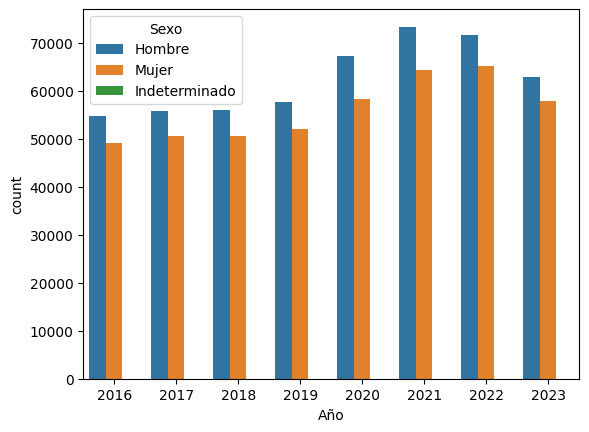

In [41]:
sns.countplot(data=df3, x="Año",hue="Sexo")

In [42]:
dfcopy["Sexo"].value_counts()/len(dfcopy["Sexo"])*100

Sexo
Hombre           52.701943
Mujer            47.284765
Indeterminado     0.013292
Name: count, dtype: float64

In [43]:
indeterminados = dfcopy.loc[dfcopy["Sexo"] == "Indeterminado"]

In [44]:
indeterminados["GLOSA_CAPITULO_DIAG1"].value_counts()

GLOSA_CAPITULO_DIAG1
Malformaciones congénitas, deformidades y anomalías cromosómicas                                   96
Ciertas afecciones originadas en el período perinatal                                              26
Síntomas, signos y hallazgos anormales clínicos y de laboratorio, no clasificados en otra parte     2
Traumatismos, envenenamientos y algunas otras consecuencias de causas externas                      1
Enfermedades del sistema circulatorio                                                               1
Name: count, dtype: int64

In [45]:
indeterminados["Edad_num"].value_counts()

Edad_num
1     82
2     18
6      6
12     3
3      3
9      2
5      2
18     2
17     1
10     1
7      1
22     1
99     1
4      1
21     1
15     1
Name: count, dtype: int64

In [46]:
dfcopy = dfcopy.loc[dfcopy["Sexo"] != "Indeterminado"]

In [47]:
x = ['Año', 'Fecha_def', 'Edad_num', 'Com_resi', 'Reg_resi',
     'Causa_bas_def', 'GLOSA_CAPITULO_DIAG1', 'GLOSA_GRUPO_DIAG1',
     'GLOSA_CATEGORIA_DIAG1', 'GLOSA_SUBCATEGORIA_DIAG1', 'lugar_def','Sexo']

In [48]:
dfcopy = dfcopy[x]

#### 4.2 Lugar de defunción como posible candidato

Revisamos rápidamente que el lugar de defunción tiene tres categorías, que pueden ser "hogar habitacion", "hospital o clínica" y "otro", este último es aproximadamente el 9% de las entradas y representa una población que murió en lugares que no son parte de las otras dos categorías, digamos que, por accidentes que generaron algún tipo de traumatismo, muertes súbitas o por enfermedades que se identificaron posterior a la defunción del individuo. Por temas prácticos decidí eliminar esta categoría del atributo, nuestro set de datos disminuyo de 947.929 a 866.756 entradas.

In [49]:
dfcopy["lugar_def"].value_counts()/len(dfcopy["lugar_def"])*100

lugar_def
Casa habitación       48.104089
Hospital o Clínica    43.344872
Otro                   8.551039
Name: count, dtype: float64

In [50]:
otro = dfcopy.loc[dfcopy["lugar_def"] == "Otro"]

In [51]:
otro["GLOSA_GRUPO_DIAG1"].value_counts()

GLOSA_GRUPO_DIAG1
 Otros efectos y los no especificados de causas externas                                     11458
Enfermedades isquémicas del corazón                                                          10223
Traumatismos que afectan múltiples regiones del cuerpo                                        9879
Traumatismos de la cabeza                                                                     6795
Causas de mortalidad mal definidas y desconocidas                                             4542
                                                                                             ...  
Espondilopatías                                                                                  1
Otros trastornos originados en el período perinatal                                              1
Trastornos endocrinos y metabólicos transitorios específicos del feto y del recién nacido        1
Trastornos flictenulares                                                                   

In [52]:
dfcopy = dfcopy.loc[dfcopy["lugar_def"] != "Otro"]

In [53]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 866756 entries, 0 to 395303
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Año                       866756 non-null  int64 
 1   Fecha_def                 866756 non-null  object
 2   Edad_num                  866756 non-null  int64 
 3   Com_resi                  866756 non-null  object
 4   Reg_resi                  866756 non-null  object
 5   Causa_bas_def             866756 non-null  object
 6   GLOSA_CAPITULO_DIAG1      866756 non-null  object
 7   GLOSA_GRUPO_DIAG1         866756 non-null  object
 8   GLOSA_CATEGORIA_DIAG1     866756 non-null  object
 9   GLOSA_SUBCATEGORIA_DIAG1  866756 non-null  object
 10  lugar_def                 866756 non-null  object
 11  Sexo                      866756 non-null  object
dtypes: int64(2), object(10)
memory usage: 86.0+ MB


### 4. Codificación y Normalización de los datos.

Se utilizó la librería de sklearn para transformar el dataframe por niveles codificados, se excluyeron los atributos de año y edad por que quise mantener la distancia de estos valores. Luego utilizando la misma librería normalizamos todo el set por la escala de minimo y maximo, en este punto aprovechamos de ver correlacion entre nuestros datos y vemos que existen algunas correlaciones como el año con la fecha o los diagnósticos con subdiagnosticos, pero todo bastante obvio. Por ultimo, realice una disminucion de dimencionalidad utilizando analisis de componenetes principales, se excluyo el atributo de sexo para utilizarlo como etiqueta, se escogieron 11 componentes para analizar la varianza acumulada, y nos muestra que con la mitad de los componente logramos una varianza acumulada aprox de 96% asi que decidi seguir trabajando con solo 6 componenetes.

In [54]:
lE = sk.LabelEncoder() 

In [55]:
for i in dfcopy.columns:
    if i in ["Año","Edad_num"]:
        continue
    else:
        dfcopy[i] = lE.fit_transform(dfcopy[i])

In [56]:
dfcopy.head()

,Año,Fecha_def,Edad_num,Com_resi,Reg_resi,Causa_bas_def,GLOSA_CAPITULO_DIAG1,GLOSA_GRUPO_DIAG1,GLOSA_CATEGORIA_DIAG1,GLOSA_SUBCATEGORIA_DIAG1,lugar_def,Sexo
0,2021,1978,50,121,16,1234,8,54,366,1319,1,0
1,2021,1975,31,59,16,125,1,32,205,725,1,0
3,2021,1978,58,289,16,415,19,195,964,2972,0,1
4,2021,1973,46,13,2,1234,8,54,366,1319,0,0
5,2021,1976,36,19,1,1810,9,144,526,1741,1,0


In [57]:
mM_Norm = sk.MinMaxScaler()

In [58]:
dfNorm = mM_Norm.fit_transform(dfcopy)

In [59]:
dfNorm = pd.DataFrame(dfNorm, columns=['año','fechaDef','edad','comuna','regio','causaBasDef','capituloDIAG1','grpoDIAG1','categoriaDIAG1','subcategoriaDIAG1','lugarDef','sexo'])

In [60]:
dfNorm.corr()

,año,fechaDef,edad,comuna,regio,causaBasDef,capituloDIAG1,grpoDIAG1,categoriaDIAG1,subcategoriaDIAG1,lugarDef,sexo
año,1.000000,0.992396,0.028444,-0.001954,-0.002257,0.116565,-0.080364,-0.057077,0.059983,-0.045669,-0.012209,-0.002230
fechaDef,0.992396,1.000000,0.029645,-0.001805,-0.002332,0.112142,-0.077048,-0.055051,0.056549,-0.044004,-0.013154,-0.001689
edad,0.028444,0.029645,1.000000,0.037768,0.046297,-0.031750,-0.038609,-0.085523,-0.092970,-0.087941,-0.216136,0.153499
comuna,-0.001954,-0.001805,0.037768,1.000000,0.170667,-0.010719,-0.001894,0.004159,-0.004890,-0.001763,-0.010537,0.016547
regio,-0.002257,-0.002332,0.046297,0.170667,1.000000,0.009074,-0.036602,-0.018072,0.017444,-0.014623,0.009868,0.029394
causaBasDef,0.116565,0.112142,-0.031750,-0.010719,0.009074,1.000000,-0.538790,-0.621417,-0.091133,-0.521292,0.225570,-0.020709
capituloDIAG1,-0.080364,-0.077048,-0.038609,-0.001894,-0.036602,-0.538790,1.000000,0.745799,0.265960,0.606805,-0.251542,0.001549
grpoDIAG1,-0.057077,-0.055051,-0.085523,0.004159,-0.018072,-0.621417,0.745799,1.000000,0.468314,0.703456,-0.170476,0.009994
categoriaDIAG1,0.059983,0.056549,-0.092970,-0.004890,0.017444,-0.091133,0.265960,0.468314,1.000000,0.635514,-0.003260,-0.026780
subcategoriaDIAG1,-0.045669,-0.044004,-0.087941,-0.001763,-0.014623,-0.521292,0.606805,0.703456,0.635514,1.000000,-0.139023,-0.012461


In [61]:
pca_ = decomposition.PCA(n_components=11)
pca_.fit(dfNorm.iloc[:,0:11])

PCA(n_components=11)

In [62]:
y = dfNorm["sexo"]

In [63]:
x = dfNorm.iloc[:,0:11]

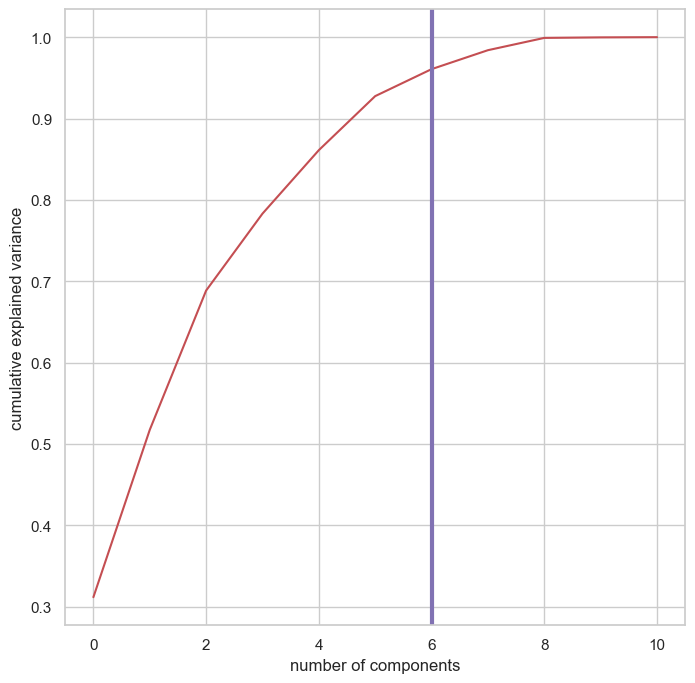

In [64]:
sns.set(style='whitegrid')
fig = plt.subplots(figsize=(8,8))
plt.plot(np.cumsum(pca_.explained_variance_ratio_),'r-')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=3, color='m', linestyle = '-', x=6, ymin=0, ymax=1)

In [65]:
explvarr = pca_.explained_variance_ratio_
cumvarr = np.cumsum(pca_.explained_variance_ratio_)

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cumvarr
pca_df['Explained Variance Ratio'] = explvarr
pca_df

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.311514,0.311514
1,0.517188,0.205674
2,0.688471,0.171283
3,0.783033,0.094561
4,0.861095,0.078062
5,0.927530,0.066436
6,0.960694,0.033164
7,0.983994,0.023300
8,0.999104,0.015111
9,0.999743,0.000638


In [66]:
x_pca = decomposition.PCA(n_components=6).fit_transform(dfNorm)
x_pca.shape

(866756, 6)

### 5. Incorporación a base de datos SQL

Guardaré el dataframe final en una base de datos SQL, en este caso la tabla no tendrá los códigos asociados a regiones, comunas ni diagnóstico, pero si agregare una columna “id”. También generamos la tabla en formato CSV.

In [67]:
db = sql.connect(host = "localhost",
                 user = "root",
                 passwd = "mysql123",
                 database = "Defunciones_en_chile_2016_2023")

In [68]:
cursor = db.cursor()

In [70]:
df3.insert(0,"id"," ")

In [ ]:
count = 0
for i in df3["id"]:
    df3["id"][i] = count
    count += 1

In [ ]:
df3.head()

In [ ]:
atributos = "id INT PRIMARY KEY, Año INT, Fecha_def VARCHAR(200), Sexo VARCHAR(200), Edad_num INT, Com_resi VARCHAR(200), Reg_resi VARCHAR(200), Causa_bas_def VARCHAR(200), GLOSA_CAPITULO_DIAG1 VARCHAR(200), GLOSA_GRUPO_DIAG1 VARCHAR(200), GLOSA_CATEGORIA_DIAG1 VARCHAR(200), GLOSA_SUBCATEGORIA_DIAG1 VARCHAR(200), lugar_def VARCHAR(200)"

In [ ]:
sentencia2 = "INSERT INTO defuncionesChile2016_2023 (id, Año, Fecha_def, Sexo, Edad_num, Com_resi, Reg_resi, Causa_bas_def, GLOSA_CAPITULO_DIAG1, GLOSA_GRUPO_DIAG1, GLOSA_CATEGORIA_DIAG1, GLOSA_SUBCATEGORIA_DIAG1, lugar_def) VALUE (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"

In [ ]:
cursor.execute("CREATE DATABASE Defunciones_en_chile_2016_2023")

In [ ]:
cursor.execute(f"CREATE TABLE defuncionesChile2016_2023({atributos})")

In [ ]:
inicio = time.time()
for i, row in df3.iterrows():
    cursor.execute(sentencia2, tuple(row))
    db.commit()
fin = time.time()
print(fin-inicio)

In [ ]:
df4 = df3.iloc[0:1,:]

In [ ]:
df3.to_csv("Defunciones_Chile_2016_2023.csv", sep =",", encoding = "latin-1")

### 6. Modelos predictivos

Se prepararon dos modelos predictivos no supervisados KMeans y DBSCAN, para el caso de KMeans se sortearan los set de entrenamiento y test por Hold-Out y K-Fold Cross Validation.

#### 6.1 División del set por Hold - Out y modelo KMeans

Primero se separaran los test de entrenamiento y test a partir de los datos reducidos por PCA mediante Hold-Out, con ellos probaremos dos modelos de KMeans variando el número de clusters (2 y 7 respectivamente) y calcularemos las estadísticas de  Accuracy, Precision, F1score y Recall del modelo. Primero vemos que todas las estadísticas dan el mismo valor, obtenemos mejores valores con 2 clusters que con 7.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.30)

In [ ]:
kmeans1 = KMeans(n_clusters=2, random_state=0).fit(X_train)

In [ ]:
y_pred1 = kmeans1.predict(X_test)

In [ ]:
print('Accuracy 1: %0.3f' % (accuracy_score(y_test, y_pred1, normalize=True)*100),'%')

In [ ]:
print('precision 1: %0.3f' % (precision_score(y_test, y_pred1, average = 'micro')*100),'%')

In [ ]:
print('f1score 1: %0.3f' % (f1_score(y_test, y_pred1, average = 'micro')*100),'%')

In [ ]:
print('recall 1: %0.3f' % (recall_score(y_test, y_pred1,average = 'weighted')*100),'%')

In [ ]:
kmeans2 = KMeans(n_clusters=7, random_state=0).fit(X_train)

In [ ]:
y_pred2 = kmeans2.predict(X_test)

In [ ]:
print('Accuracy 2: %0.3f' % (accuracy_score(y_test, y_pred2, normalize=True)*100),'%')

In [ ]:
print('precision 2: %0.3f' % (precision_score(y_test, y_pred2, average = 'micro')*100),'%')

In [ ]:
print('f1score 2: %0.3f' % (f1_score(y_test, y_pred2, average = 'micro')*100),'%')

In [ ]:
print('recall 2: %0.3f' % (recall_score(y_test, y_pred2,average = 'weighted')*100),'%')

#### 6.2 División del set por K-Fold Cross Validation y modelo KMeans

Ahora se probó separar los set para el modelo mediante K-Fold Cross Validation, especificando que realice 10 splits. Para el modelo de KMeans se pediran 2 clusters, además se calcularán las 4 estadísticas del modelo ya mencionadas y con ellas confeccione un df donde se graficara el f1 score. En general obtener mejores score a menor número de clusters, esto puede ser por la poca correlación entre los atributos entregados o que en verdad no existe una relación o un buen atributo que predecir dentro de este set de datos.

In [ ]:
kf = KFold(n_splits=10)

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)

In [ ]:
acc = []
pre = []
rec = []
f1 = []

for train_idx, test_idx in kf.split(x_pca):
    X_train, X_test = x.iloc[train_idx], x.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    model = kmeans.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred, normalize=True)*100)
    pre.append(precision_score(y_test, y_pred, average = 'micro')*100)
    f1.append(f1_score(y_test, y_pred, average = 'micro')*100)
    rec.append(recall_score(y_test, y_pred,average = 'weighted')*100)

In [ ]:
fold = [i+1 for i in range(len(acc))]
scores = pd.DataFrame(np.array([fold,acc,pre,rec,f1]).T,columns=["Folds","Accuracy","Precision", "Recall", "F1-score"])

scores.head(15)

In [ ]:
f = plt.subplots(figsize=(10, 8))
plt.plot(scores['Folds'],scores['F1-score'],'ro',markersize=10,alpha=0.7)
plt.plot(scores['Folds'],scores['F1-score'],'r--',alpha=0.7)
plt.ylim(0,105)
plt.xlabel('n fold',fontsize=20)
plt.ylabel('F1 Score',fontsize=20)
plt.title('F1 Score \n ---------------------- \n Folds: %i, mean: %.2f, std: %.2f \n' %
             (len(scores['F1-score']),np.mean(scores['F1-score']),np.std(scores['F1-score'])),fontsize=22)


#### 6.3 División del set por Hold - Out Validation y modelo DBSCAM

Se realizó la división de los sets de entrenamiento y testeo mediante Hold - Out, se le entregaron los datos reducidos por PCA y se le pidió que el 20% de los datos se utilicen para el set test.

Luego se probaron tres modelos de DBSCAM variando la distancia min entre clusters (0.2, 0.15 y 0.17) y el número mínimo de muestras para que se consideren clusters (20, 30 y 10), como métrica de cálculo de distancia utilizara la euclidiana y el algoritmo a utilizar la que encuentre conveniente ("auto"). Luego y para cada modelo se calculó el número de clusters encontrados, cuantos puntos ruidosos encontró y las estadísticas asociadas a la precisión de la predicción (accuracy, precision,f1 score y recall). Aunque los resultados obtenidos dependen de los sets y pueden variar entre run y run, mencionar que el primer modelo encontró 10 clusters totales de los cuales 1 está conformado con 626 datos ruidosos y con scores de 48.64%, el segundo modelo identificó 21 clusters totales de los cuales 1 tenía 7701 datos ruidosos con score de 38,49% y el tercer modelo encontró 10 clusters totales, de los cuales 1 tiene 513 datos ruidosos, con score de 48,61%. Finalmente se grafico los clusters encontrados por el modelo 3, donde se pueden ver los 9 clusters y en negro los datos ruidosos.


X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.20)

In [ ]:
modelo1 = DBSCAN(eps= .2, min_samples=20, metric="euclidean", algorithm="auto").fit(X_train)

In [ ]:
y_pred1 = modelo1.fit_predict(X_test)

In [ ]:
labels1 = modelo1.labels_

In [ ]:
num1 = np.unique(labels1)

In [ ]:
len(set(labels1)) - (1 if -1 in labels1 else 0)

In [ ]:
list(labels1).count(-1)

In [ ]:
print("accuracy score: %0.2f"%(accuracy_score(y_test, y_pred1, normalize=True)*100),"%")
print("precision score: %0.2f"%(precision_score(y_test, y_pred1, average = "micro")*100),"%")
print("f1 score: %0.2f"%(f1_score(y_test, y_pred1, average = 'micro')*100),"%")
print("recall score: %0.2f"%(recall_score(y_test, y_pred1,average = 'weighted')*100),"%")

In [ ]:
modelo2 = DBSCAN(eps= .15, min_samples=30, metric="euclidean", algorithm="auto").fit(X_train)

In [ ]:
y_pred2 = modelo2.fit_predict(X_test)

In [ ]:
labels2 = modelo2.labels_

In [ ]:
num2 = np.unique(labels2)

In [ ]:
len(set(labels2)) - (1 if -1 in labels2 else 0)

In [ ]:
list(labels2).count(-1)

In [ ]:
print("accuracy score: %0.2f"%(accuracy_score(y_test, y_pred2, normalize=True)*100),"%")
print("precision score: %0.2f"%(precision_score(y_test, y_pred2, average = "micro")*100),"%")
print("f1 score: %0.2f"%(f1_score(y_test, y_pred2, average = 'micro')*100),"%")
print("recall score: %0.2f"%(recall_score(y_test, y_pred2,average = 'weighted')*100),"%")

In [ ]:
modelo3 = DBSCAN(eps= .17, min_samples=10, metric="euclidean", algorithm="auto").fit(X_train)

In [ ]:
y_pred3 = modelo3.fit_predict(X_test)

In [ ]:
labels3 = modelo3.labels_

In [ ]:
np.unique(labels3)

In [ ]:
n_clusters_ = len(set(labels3)) - (1 if -1 in labels3 else 0)

In [ ]:
n_clusters_

In [ ]:
list(labels3).count(-1)

In [ ]:
print("accuracy score: %0.2f"%(accuracy_score(y_test, y_pred3, normalize=True)*100),"%")
print("precision score: %0.2f"%(precision_score(y_test, y_pred3, average = "micro")*100),"%")
print("f1 score: %0.2f"%(f1_score(y_test, y_pred3, average = 'micro')*100),"%")
print("recall score: %0.2f"%(recall_score(y_test, y_pred3,average = 'weighted')*100),"%")

In [ ]:
unique_labels = set(labels3)
core_samples_mask = np.zeros_like(labels3, dtype=bool)

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels3 == k

    xy = X_test[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X_test[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

### 7. Conclusión

Aunque los sets de datos seleccionados nos entregan información relevante sobre la situación del país y nos permiten visualizar problemas y generar planes para detener enfermedades o situaciones que están provocando el aumento de las defunciones en Chile. No es un buen set para poder realizar modelos predictivos, o por lo menos, no en su totalidad, queda pendiente encontrar dentro de esta data sub-sets, mucho más específicos, que puedan ser usados para generar mejores modelos.
En este caso, al usar la totalidad de la data depurada no logramos generar buenos modelos, con estadísticas de precisión alrededor del 50%.
Finalmente el dataframe guardado en MySQL será utilizado para realizar un reporte dinámico en Power BI.